<a href="https://colab.research.google.com/github/Ruani-Filipe/TechChallenge1FIAP/blob/main/Tech_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Pós Tech FIAP - Regressão Linear

Projeto do primeiro trimestre para modelagem de algoritmo em machine learning utilizando dados de plano de saúde

Autores:
* Alexsander Maia Simas
* Erick Bognar
* Leonardo Guedes
* Ruâni Filipe
* Talita Hipolito

> **Informações do dataset**: "insurance.csv"
>Dataset retirado da plataforma "kaggle" - https://www.kaggle.com/datasets/mirichoi0218/insurance/data

>> **Colunas**
>>* Age: Idade
>>* Sex: Sexo - Feminino:1 e Masculino:0
>>* bmi: IMC - Índice de massa corporal, este calculo utiliza o peso e a altura da pessoa (kg/altura^2)
>>* Children: Número de filhos
>>* Smoker: Fumante - Sim:1 e Não:0
>>* Region: Northeast(Nordeste)-1, Southeast(Sudeste)-2, southwest(Sudoeste)-3 e Northwest(Noroeste)-4
>>* Charges: Encargos de despesas médicas individuais cobradas pelo seguro de saúde.

In [ ]:
# Instalando pacote watermark
!pip install -q -U watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00


In [ ]:
# Importes de pacotes que serão utilizados neste projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot

In [ ]:
# Versão dos pacotes usados neste Colab Notebook
%reload_ext watermark
%watermark -a "Leonardo Guedes - Alexsander Simas - Ruâni Filipe - Erick Bognar - Talita Hipolito" --iversion

Author: Leonardo Guedes - Alexsander Simas - Ruâni Filipe - Erick Bognar - Talita Hipolito

yellowbrick: 1.5
pandas     : 2.2.2
xgboost    : 2.1.4
matplotlib : 3.10.0
seaborn    : 0.13.2
sklearn    : 1.6.1
plotly     : 5.24.1
numpy      : 2.0.2



### Carregando o dataset

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Visualizando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# verificando valores nulos
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Modificação das colunas com valores inteiros - Engenharia de atributos

In [ ]:
# Vamos modificar as colunas "sex" e "smoker" que possuem valores "object" para "int64" - Aplicado a técnica de "map"
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


#### Verificação estatística visual - Detecção de Outliers (coluna alvo)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['charges'],
                     boxpoints='outliers',
                     marker_color='blue',
                     line_color='blue'))
fig.update_layout(title='Distribuição estatística da coluna "Charges"',
                  xaxis_title="Taxas",
                  yaxis_title='',
                  template='plotly_white')
fig.show()

#### Verificação estatística visual - Detecção de Outliers (demais colunas)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['age'],
                     boxpoints='outliers',
                     marker_color='gold',
                     line_color='gold'))
fig.update_layout(title='Distribuição estatística da coluna "Age"',
                  xaxis_title="Taxas",
                  yaxis_title='',
                  template='plotly_white')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['bmi'],
                     boxpoints='outliers',
                     marker_color='green',
                     line_color='green'))
fig.update_layout(title='Distribuição estatística da coluna "IMC"',
                  xaxis_title="IMC",
                  yaxis_title='',
                  template='plotly_white')
fig.show()

### Análise de correlação - Com diversos Coeficientes para identificação de linearidade

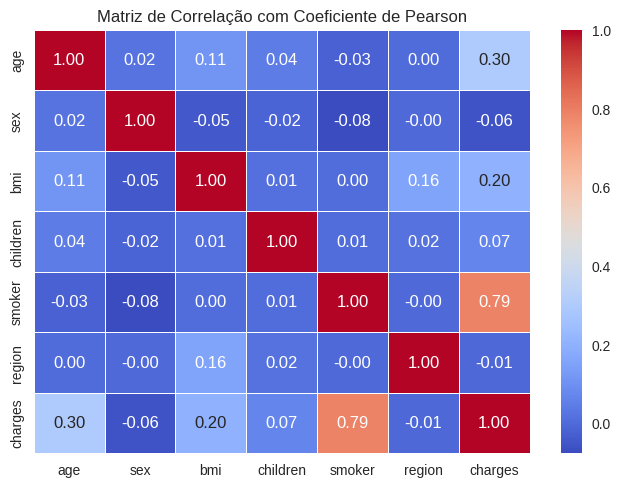

In [ ]:
# Análise de correlação - Pearson
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação com Coeficiente de Pearson")
plt.show()

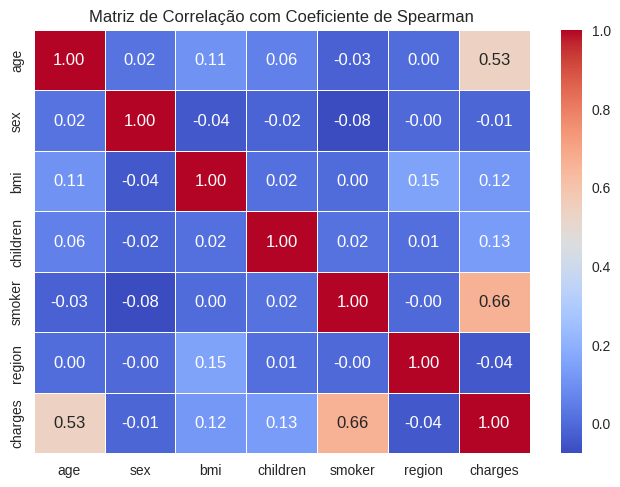

In [ ]:
# Análise de correlação - Spearman
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação com Coeficiente de Spearman")
plt.show()

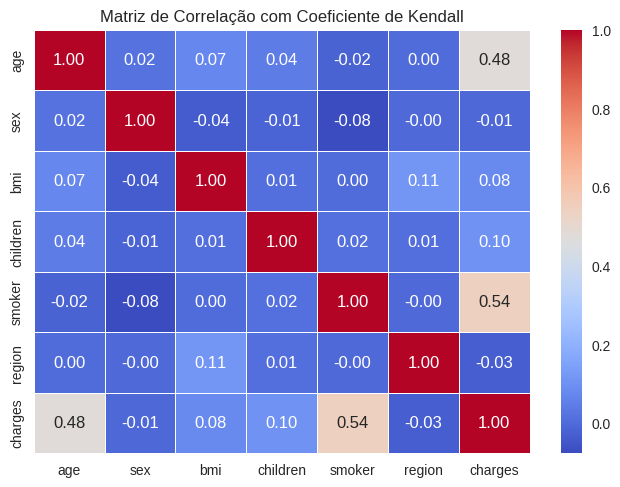

In [ ]:
# Análise de correlação - Kendall
sns.heatmap(df.corr(method='kendall'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação com Coeficiente de Kendall")
plt.show()

Após montar varias matrizes de correlação, o coeficiente de Pearson mostrou que realmente temos uma correlação baixa positiva, este dataset possui relações lineares.



---



Vamos pegar as colunas que tiveram um coeficiente de correlação mais alto em relação a coluna alvo que neste caso é "charges" e vamos montar um gráfico de dispersão para observarmos um padrão e se está crescendo de acordo com a variável.

In [ ]:
# Variaveis "charges x age"
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['age'], y=df['charges'], mode='markers', marker=dict(size=6,opacity=0.6)))
fig.update_layout(title='Gráfico de distribuição de pontos',
                  xaxis_title='Idade',
                  yaxis_title='Encargos')
fig.show()

In [ ]:
# Variaveis "charges x smoker"
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['charges'], y=df['smoker'], mode='markers', marker=dict(size=6,opacity=0.6)))
fig.update_layout(
    title='Gráfico de distribuição de Encargos por Status de fumante',
    xaxis_title='Encargos',
    yaxis_title='Fumante',
    yaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Não Fumante', 'Fumante']
    )
)
fig.show()

Neste gráfico de distribuição, podemos notar que pessoas que fumam, tem maiores encargos, já pessoas que não fumam gastam menos com encargos.

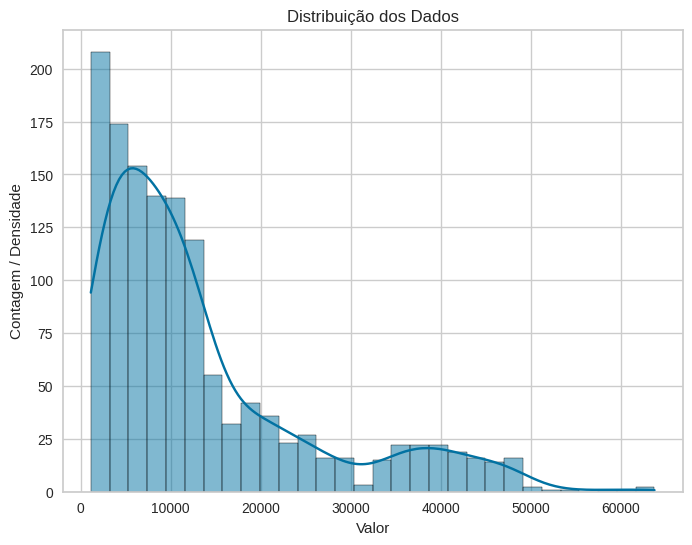

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True)

plt.title("Distribuição dos Dados")
plt.xlabel("Valor")
plt.ylabel("Contagem / Densidade")
plt.show()

Temos uma assimetria positiva, pois a concentração de dados está mais a esquerda do gráfico e a "cauda" do gráfico de distribuição se estende mais para o lado direito, mostra uma concentração de valores baixos e com maiores contagens.

In [ ]:
# Calcular a skewness para uma coluna específica
skewness = df['charges'].skew()
print(f"Skewness da coluna 'Charges': {skewness:.2f}")

# Calcular a skewness para todas as colunas numéricas do DataFrame
skewness_all = df.skew()
print("\nSkewness de todas as colunas:")
print(skewness_all.round(2))

Skewness da coluna 'Charges': 1.52

Skewness de todas as colunas:
age         0.06
sex         0.02
bmi         0.28
children    0.94
smoker      1.46
region     -0.04
charges     1.52
dtype: float64


Com essa análise de Skewness, temos a confirmação que  a coluna Charges tem uma alta assimetria e precisamos utilizar algoritmos que são resistentes a dados assimetricos como o XGBoost, Random Forest Regressor.

#### Etapa de separação de colunas e dados de treino e teste

In [ ]:
X = df.drop(columns=['charges'])
y = df['charges'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

In [ ]:
def calcular_metricas_regressao(y_test, y_pred):

  # Calculate RMSE manually for compatibility with older scikit-learn versions
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Calcular acurácia em porcentagem para R²
  acuracia_r2 = r2 * 100

  # Calcular acurácia em porcentagem para MSE
  acuracia_mse = (1 - rmse / np.var(y_test)) * 100

  metricas = {
      'Raiz do erro quadrático médio': round(rmse, 4),
      'Erro Absoluto médio': round(mae, 4),
      'R2 Score': round(r2, 4),
      'Acurácia (R²)':"{}%".format(round(acuracia_r2, 4)),
      'Acurácia MSE':"{}%".format(round(acuracia_mse, 4))
  }

  return metricas

#### Modelo - LinearRegression

In [ ]:
# Treina o modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Faz uma previsão
y_pred_lr = model_lr.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_lr)

{'Raiz do erro quadrático médio': np.float64(6027.1292),
 'Erro Absoluto médio': 4243.5928,
 'R2 Score': 0.7516,
 'Acurácia (R²)': '75.159%',
 'Acurácia MSE': '99.9959%'}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



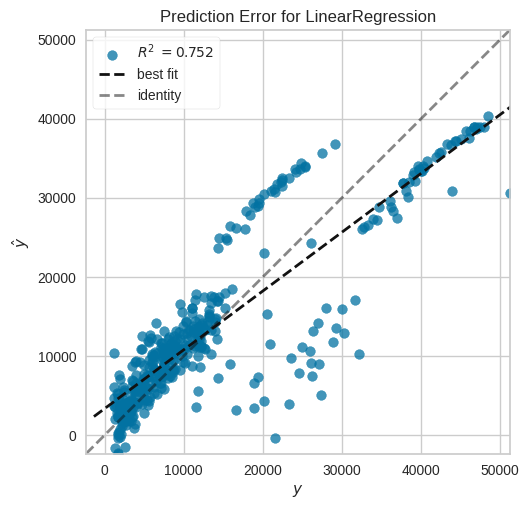

In [ ]:
visualizer = prediction_error(model_lr, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



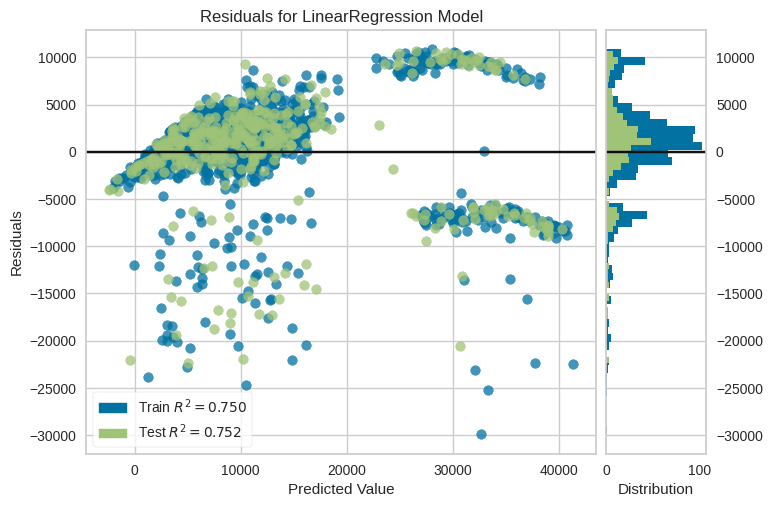

In [ ]:
viz = residuals_plot(model_lr, X_train, y_train, X_test, y_test)

#### Modelo - DecisionTreeRegression

In [ ]:
modelTree = DecisionTreeRegressor(random_state=42)
modelTree.fit(X_train, y_train)
# Faz uma previsão
y_pred_dtr = modelTree.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_dtr)

{'Raiz do erro quadrático médio': np.float64(6537.2714),
 'Erro Absoluto médio': 3035.5277,
 'R2 Score': 0.7078,
 'Acurácia (R²)': '70.7759%',
 'Acurácia MSE': '99.9955%'}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



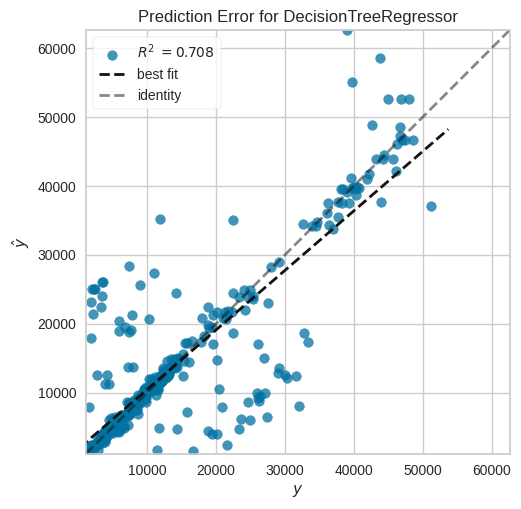

In [ ]:
visualizer = prediction_error(modelTree, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



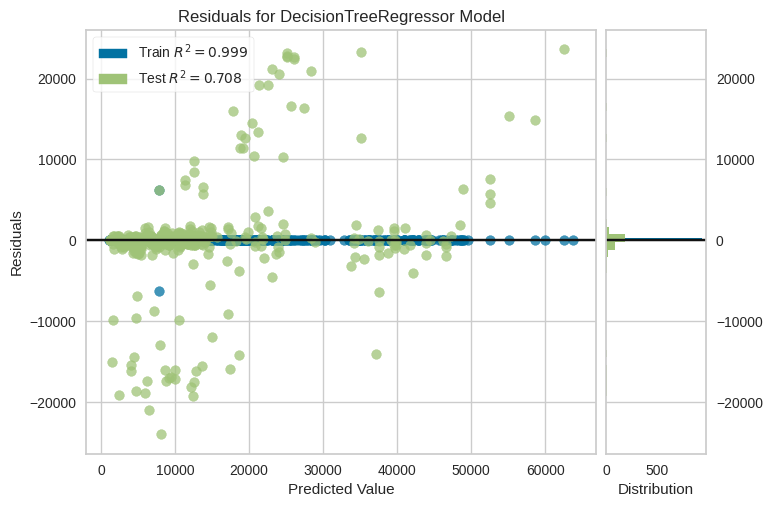

In [ ]:
viz = residuals_plot(modelTree, X_train, y_train, X_test, y_test)

#### Testando com algoritmos resistentes a dados assimétricos

#### Modelo - XGBoost (Gradient Boosting Regressors)

In [ ]:
modelo_xgboost_primario = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
resultado_xgboost = modelo_xgboost_primario.fit(X_train, y_train)
y_pred_xgboost = resultado_xgboost.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_xgboost)

{'Raiz do erro quadrático médio': np.float64(4933.1586),
 'Erro Absoluto médio': 2819.454,
 'R2 Score': 0.8336,
 'Acurácia (R²)': '83.3583%',
 'Acurácia MSE': '99.9966%'}

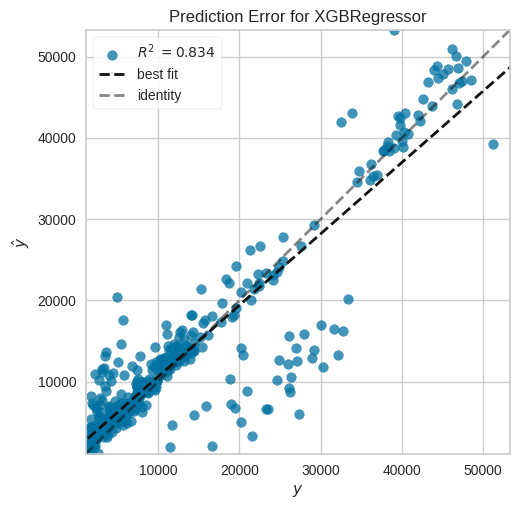

In [ ]:
visualizer = prediction_error(modelo_xgboost_primario, X_train, y_train, X_test, y_test)

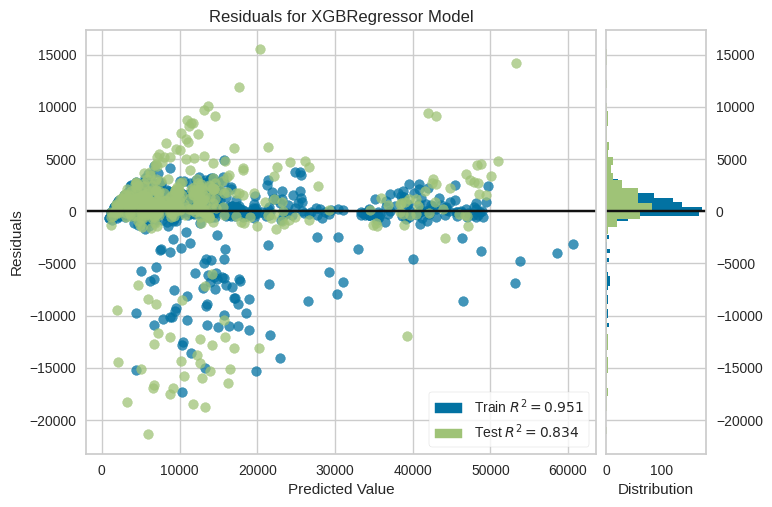

In [ ]:
viz = residuals_plot(modelo_xgboost_primario, X_train, y_train, X_test, y_test)

#### Modelo - Random Forest Regressor

In [ ]:
model_rf_primário = RandomForestRegressor(max_depth=5, random_state=7)
model_rf_primário.fit(X_train, y_train)
y_pred_rf = model_rf_primário.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do erro quadrático médio': np.float64(4668.1638),
 'Erro Absoluto médio': 2657.4274,
 'R2 Score': 0.851,
 'Acurácia (R²)': '85.0982%',
 'Acurácia MSE': '99.9968%'}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



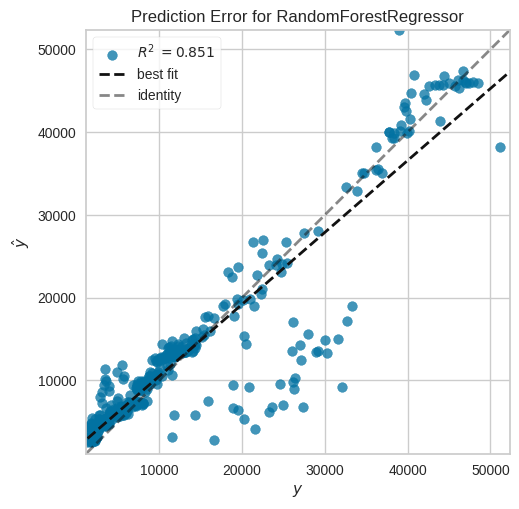

In [ ]:
visualizer = prediction_error(model_rf_primário, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



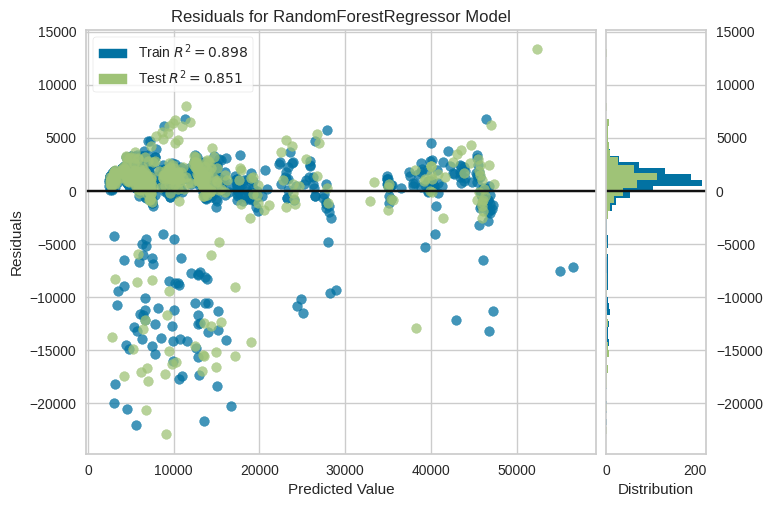

In [ ]:
viz = residuals_plot(model_rf_primário, X_train, y_train, X_test, y_test)

#### Validação cruzada - 1º modelo LinearRegression

In [ ]:
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=10, shuffle=True, random_state=7)

cv_results = cross_validate(model_lr, X_train, y_train, cv=cv, scoring = scoring)

In [ ]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std:{std_score}")
    print('----------------------------------------------------------------')

MAE Scores: ['-4344.652', '-4908.429', '-3188.569', '-4507.727', '-3528.823', '-4384.673', '-4614.562', '-4631.826', '-3904.693', '-4519.797']
MAE Média: -4253.375, Std:514.236
----------------------------------------------------------------
RMSE Scores: ['-5470.990', '-7153.049', '-4461.672', '-6236.059', '-5380.232', '-6555.612', '-6312.440', '-6747.676', '-5707.931', '-6476.872']
RMSE Média: -6050.253, Std:752.892
----------------------------------------------------------------
R2 Scores: ['0.851', '0.715', '0.776', '0.741', '0.742', '0.657', '0.748', '0.710', '0.729', '0.734']
R2 Média: 0.740, Std:0.047
----------------------------------------------------------------


In [ ]:
# Parametros especificos para LinearRegression
param_grid_lr = {
      'fit_intercept': [True, False],
      'copy_X': [True, False]
}

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=10)

model_grid_lr = GridSearchCV(model_lr,
                          param_grid= param_grid_lr,
                          scoring='r2',
                          cv=cv)

model_grid_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [ ]:
model_grid_lr.best_estimator_

LinearRegression()

In [ ]:
y_pred_model_grid_lr = model_grid_lr.predict(X_test)

metricas_model_grid_lr = calcular_metricas_regressao(y_test, y_pred_model_grid_lr)
metricas_model_grid_lr

{'Raiz do erro quadrático médio': np.float64(6027.1292),
 'Erro Absoluto médio': 4243.5928,
 'R2 Score': 0.7516,
 'Acurácia (R²)': '75.159%',
 'Acurácia MSE': '99.9959%'}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



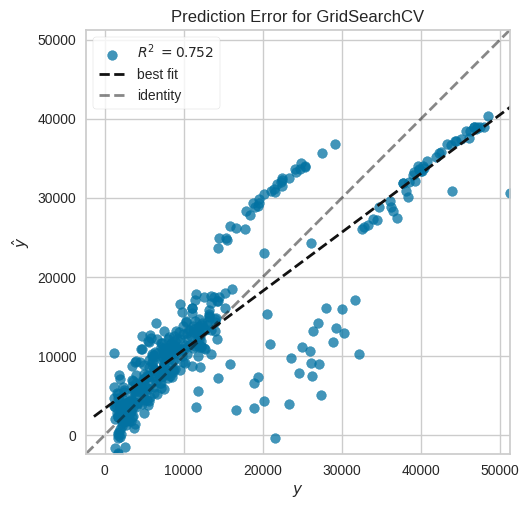

In [ ]:
visualizer = prediction_error(model_grid_lr, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



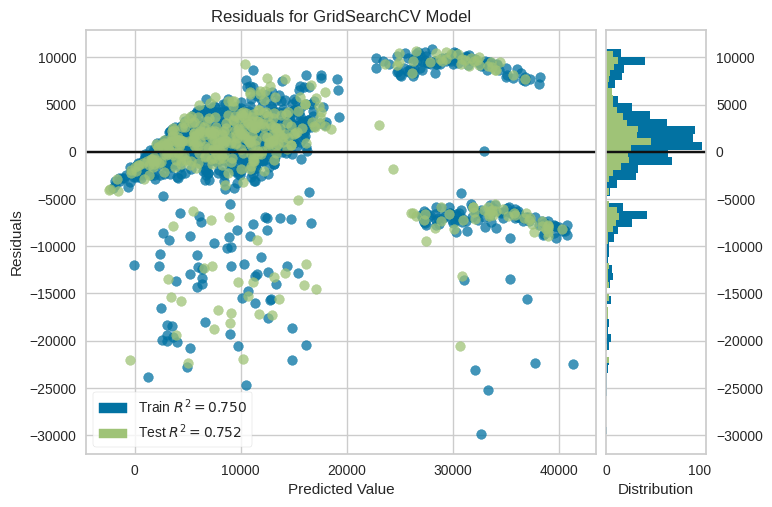

In [ ]:
viz = residuals_plot(model_grid_lr, X_train, y_train, X_test, y_test)

#### Validação cruzada - 2º modelo DecisionTree

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=7)

cv_results = cross_validate(modelTree, X_train, y_train, cv=cv, scoring = scoring)

In [ ]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std:{std_score}")
    print('----------------------------------------------------------------')

MAE Scores: ['-2882.588', '-2886.950', '-2896.553', '-3177.816', '-1987.478', '-3651.953', '-3721.846', '-4612.021', '-3118.051', '-2666.556']
MAE Média: -3160.181, Std:671.367
----------------------------------------------------------------
RMSE Scores: ['-6622.215', '-6276.328', '-6494.172', '-6605.180', '-5024.888', '-7454.107', '-7317.473', '-8498.976', '-6479.304', '-5723.669']
RMSE Média: -6649.631, Std:905.855
----------------------------------------------------------------
R2 Scores: ['0.781', '0.781', '0.525', '0.709', '0.775', '0.556', '0.661', '0.540', '0.651', '0.792']
R2 Média: 0.677, Std:0.102
----------------------------------------------------------------


In [ ]:
param_grid_tree = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],

}

model_grid_Tree = GridSearchCV(modelTree,
                          param_grid= param_grid_tree,
                          scoring='r2',
                          cv=cv)

model_grid_Tree.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             scoring='r2')

In [ ]:
model_grid_Tree.best_estimator_


DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, random_state=42)

In [ ]:
y_pred_model_grid_Tree = model_grid_Tree.predict(X_test)

metricas_model_grid_Tree = calcular_metricas_regressao(y_test, y_pred_model_grid_Tree)
metricas_model_grid_Tree

{'Raiz do erro quadrático médio': np.float64(4709.7143),
 'Erro Absoluto médio': 2707.7915,
 'R2 Score': 0.8483,
 'Acurácia (R²)': '84.8317%',
 'Acurácia MSE': '99.9968%'}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



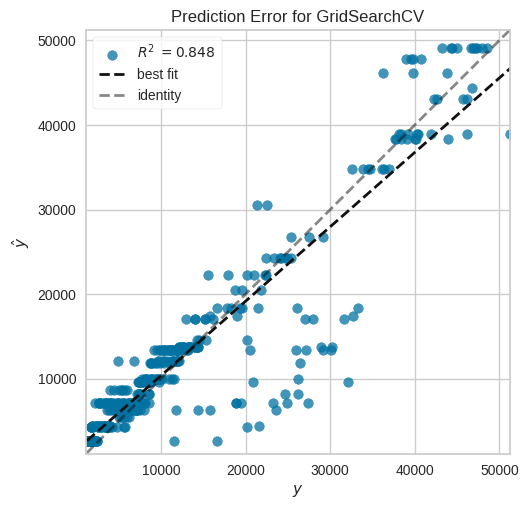

In [ ]:
visualizer = prediction_error(model_grid_Tree, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



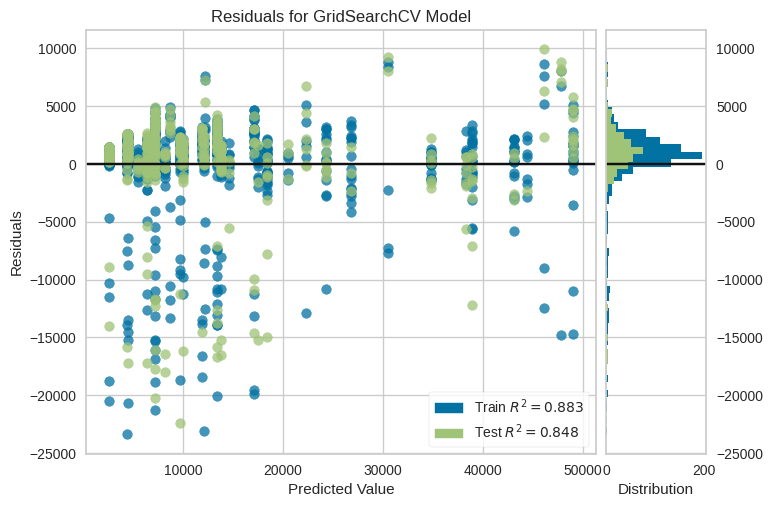

In [ ]:
viz = residuals_plot(model_grid_Tree, X_train, y_train, X_test, y_test)

#### Validação cruzada - 3º modelo XGBoost

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=7)

cv_results = cross_validate(modelo_xgboost_primario, X_train, y_train, cv=cv, scoring = scoring)

In [ ]:
# Parametros para outros algoritmos
param_grid_xgboost = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5,],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.1],
    'min_child_weight': [5, 10],
    'reg_alpha': [0.001],
    'reg_lambda': [10, 100]
}

In [ ]:
model_grid_xgoost = GridSearchCV(modelo_xgboost_primario,
                          param_grid= param_grid_xgboost,
                          scoring='r2',
                          cv=cv)

model_grid_xgoost.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.05], 'max_depth': [3, 5],
                         'min_child_weight': [5, 10],
                         'n_estimators': [100, 200], 'reg_alpha': [0.001],
                         'reg_lambda': [10, 100], 'subsample': [0.7, 0.8]},
             scoring='r2')

In [ ]:
model_grid_xgoost.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_model_grid_xgboost = model_grid_xgoost.predict(X_test)

metricas_model_grid_xgoost = calcular_metricas_regressao(y_test, y_pred_model_grid_xgboost)
metricas_model_grid_xgoost

{'Raiz do erro quadrático médio': np.float64(4535.8201),
 'Erro Absoluto médio': 2548.4464,
 'R2 Score': 0.8593,
 'Acurácia (R²)': '85.9311%',
 'Acurácia MSE': '99.9969%'}

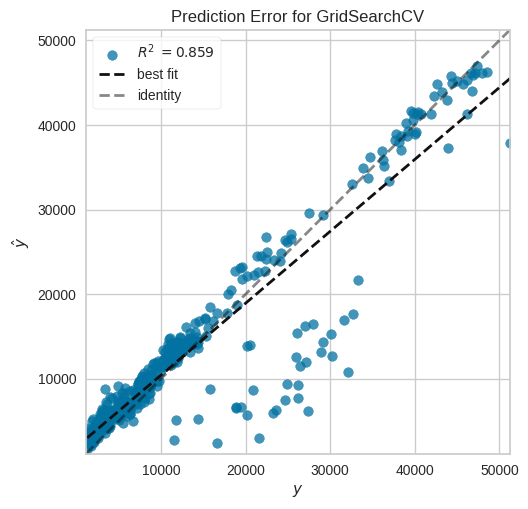

In [ ]:
visualizer = prediction_error(model_grid_xgoost, X_train, y_train, X_test, y_test)

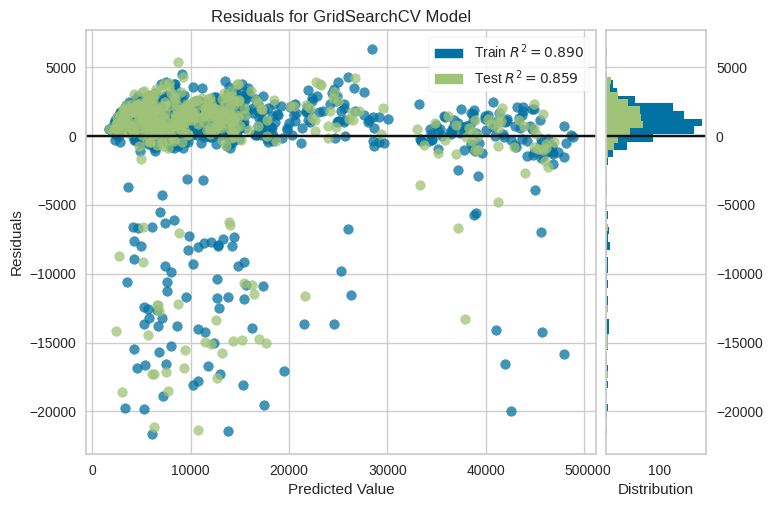

In [ ]:
viz = residuals_plot(model_grid_xgoost, X_train, y_train, X_test, y_test)

#### Validação cruzada - 4º modelo Random Forest Regressor

In [ ]:
param_grid_random_forest = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 0.7],
}

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=7)

cv_results = cross_validate(model_rf_primário, X_train, y_train, cv=cv, scoring = scoring)

In [ ]:
model_grid_randomforest = GridSearchCV(model_rf_primário,
                          param_grid= param_grid_random_forest,
                          scoring='r2',
                          cv=cv)

model_grid_randomforest.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestRegressor(max_depth=5, random_state=7),
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt', 0.7],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [200, 300]},
             scoring='r2')

In [ ]:
model_grid_randomforest.best_estimator_

RandomForestRegressor(max_depth=10, max_features=0.7, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=200, random_state=7)

In [ ]:
y_pred_model_grid_random = model_grid_randomforest.predict(X_test)

metricas_model_grid_randomforest = calcular_metricas_regressao(y_test, y_pred_model_grid_random)
metricas_model_grid_randomforest

{'Raiz do erro quadrático médio': np.float64(4607.8359),
 'Erro Absoluto médio': 2572.7249,
 'R2 Score': 0.8548,
 'Acurácia (R²)': '85.4808%',
 'Acurácia MSE': '99.9968%'}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



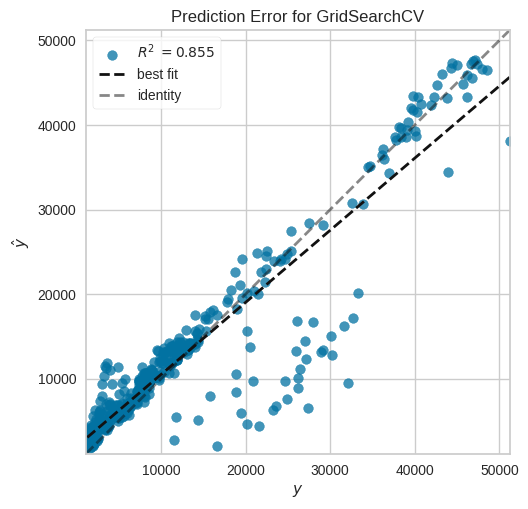

In [ ]:
visualizer = prediction_error(model_grid_randomforest, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



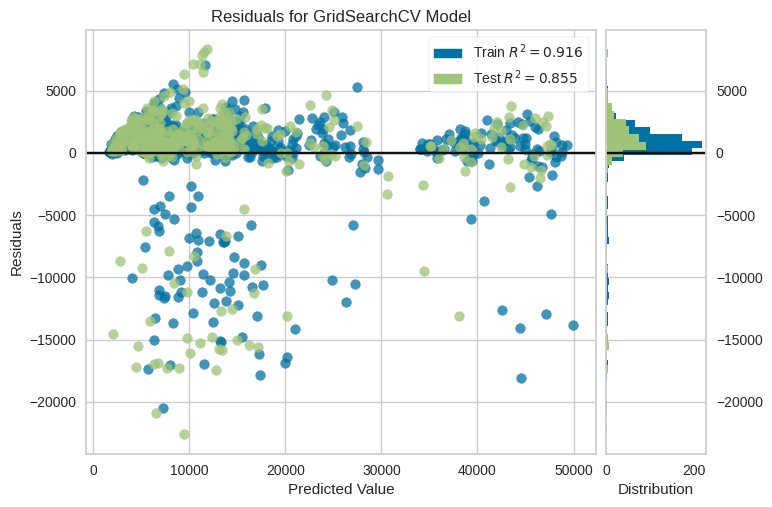

In [ ]:
viz = residuals_plot(model_grid_randomforest, X_train, y_train, X_test, y_test)

Após a aplicação da técnica de validação cruzada utilizando o GridSearchCV os melhores modelos são:

1. **XGBoost (com o Grid) - R²:0.8593**
2. Random Forest Regressor (com o Grid) - R²:0.854
3. Random Forest Regressor (sem o Grid) - R²:0.851
4. DecisionTree (com o Grid) - R²:0.8483

